# Лабораторная работа 4

Жукова Анна 6302-020302D

## Практика TensorFlow 2.x

### Задание

В данной лабораторной работе будет практиковаться материал из лекций по TensorFlow на примере решения задачи классификации изображений из датасета Fashion MNIST. Fashion MNIST - набор черно-белых изображений размера 28х28, что поделены на 10 классов. Будет построена с нуля и обучена модель логистической регрессии используя как низкоуровневый API. Опционально решение той же задачи нейронной сетью, построенной и обученной с использованием Keras.

In [1]:
import tensorflow as tf
import numpy as np



In [2]:
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


0 Базовые операции.
   - 0.1 Сгенерируйте три непересекающихся гауссовых облака, используя `tf.random`. Визуализируйте их разными цветами, используя matplotlib.
   - 0.2 Сгенерируйте случайную матрицу 2x2, умножьте каждую точку в облаках на эту матрицу. Повторно визуализируйте облака.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

(30000, 1)


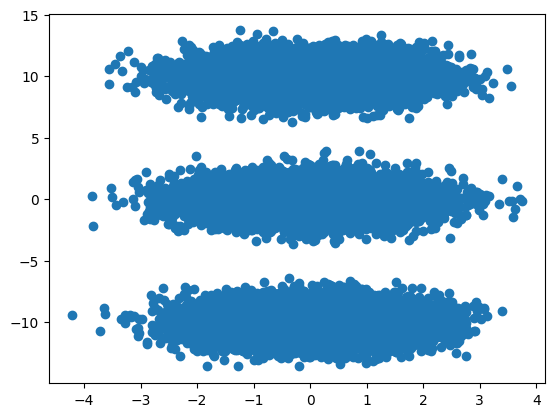

In [5]:
y1 = tf.random.normal(
    shape = (10000,1),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
y2 = tf.random.normal(
    shape = (10000,1),
    mean=10.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
y3 = tf.random.normal(
    shape = (10000,1),
    mean=-10.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
y = tf.concat([y1,y2,y3], axis = 0).numpy()
print(y.shape)
x1 = tf.random.normal(
    shape = (10000,1),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
x2 = tf.random.normal(
    shape = (10000,1),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
x3 = tf.random.normal(
    shape = (10000,1),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
x = tf.concat([x1,x2,x3], axis = 0).numpy()

plt.scatter(x, y)
plt.show()

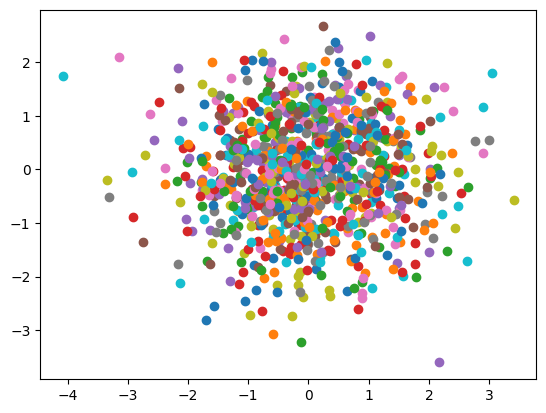

In [89]:
y = tf.random.normal(
    shape = (1000,2),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
y1 = y.numpy()
for i in range(1000):
  plt.scatter(y1[i][0], y1[i][1])
plt.show()

In [84]:
matrix =tf.random.normal(
    shape = (2,2),
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
matrix

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.83069444,  2.2185018 ],
       [ 1.3856726 , -0.848272  ]], dtype=float32)>

In [87]:
y2 = tf.matmul(y, matrix)

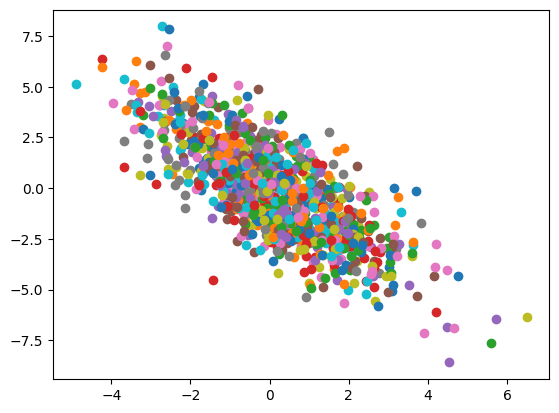

In [88]:
for i in range(1000):
  plt.scatter(y2[i][0], y2[i][1])
plt.show()

1 Загрузите датасет Fashion MNIST, используя метод из [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets). Визуализируйте несколько изображений, используя библиотеку matplotlib.

**Классы в FashionMnist**

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [8]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


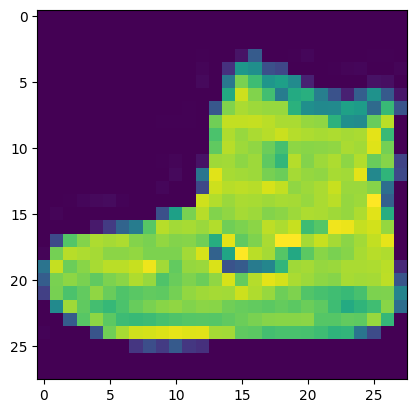

In [9]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

2 Нормализуйте данные либо средним и СКО, либо приведя значения пикселей в интервал [-1, 1].

In [10]:
type(training_images)

numpy.ndarray

In [11]:
meanIm = training_images.mean()
stdIm = training_images.std()
training_images = (training_images - meanIm)/stdIm

In [12]:
meanIm = test_images.mean()
stdIm = test_images.std()
test_images = (test_images - meanIm)/stdIm

3 Создайте обучающий и тестовый TensorFlow Dataset из нормализованного набора данных. К обучающему датасету добавьте перемешивание (`.shuffle`). К обоим датасетам добавьте генерацию батчей размера 128 (`.batch(128)`).

https://www.tensorflow.org/tutorials/load_data/numpy?hl=ru

In [13]:
tf_train = tf.data.Dataset.from_tensor_slices((training_images, training_labels.astype('int64')))
tf_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels.astype('int64')))

In [14]:
tf_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
tf_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [16]:
tf_train.__len__(), tf_test.__len__()

(<tf.Tensor: shape=(), dtype=int64, numpy=60000>,
 <tf.Tensor: shape=(), dtype=int64, numpy=10000>)

In [17]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 100

tf_train = tf_train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
tf_test = tf_test.batch(BATCH_SIZE)


In [18]:
tf_train.__len__(), tf_test.__len__()

(<tf.Tensor: shape=(), dtype=int64, numpy=469>,
 <tf.Tensor: shape=(), dtype=int64, numpy=79>)

4 Напишите класс слоя `Flatten`, что трансформирует изображения из матричного в векторный вид: [28, 28] -> [28 * 28]. Класс слоя должен наследоваться от `tf.Module`. Для трансформации тензоров изображений использовать `tf.reshape`.

In [19]:
tf_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
class Flatten(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
    def __call__(self, x):
        return tf.reshape(x,[tf.shape(x)[0], 28 * 28])

In [21]:
x = tf_train
fl = Flatten()
fl(next(iter(x))[0])

<tf.Tensor: shape=(128, 784), dtype=float64, numpy=
array([[-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
        -0.81025766, -0.81025766],
       [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
        -0.81025766, -0.81025766],
       [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
        -0.81025766, -0.81025766],
       ...,
       [-0.81025766, -0.81025766, -0.79914916, ..., -0.81025766,
        -0.81025766, -0.81025766],
       [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
        -0.81025766, -0.81025766],
       [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
        -0.81025766, -0.81025766]])>

5 Напишите класс линейного слоя `Linear`, что умножает входной вектор на матрицу весов. Класс слоя должен наследоваться от `tf.Module`. Матрицу весов хранить в `tf.Variable`. Параметры конструктора: `in_d` - размерность входного вектора, `out_d` - размерность выходного вектора. В качестве начальной инициализации весов использовать гауссово распределение с СКО=0.01.

In [22]:
class Linear(tf.Module):
    def __init__(self, in_d, out_d, name=None):
        # in_d - input dimensionality
        # out_d - output dimensionality
        # В случае с tf.Module вызывать конструктор родительского класса обязательно!
        super().__init__(name=name)
        w = tf.random.normal(shape=[in_d, out_d], stddev=0.01, dtype='float64')
        self.w = tf.Variable(w, name='linear')

    def __call__(self, x):
        return tf.matmul(x, self.w)

6 Напишите класс модели логистической регрессии `LogisticRegression`, что компонует в себе слои `Linear` и `Flatten`. Класс модели должен наследоваться от `tf.Module`. В качестве функции активации используйте `tf.nn.softmax`.
Создайте объект модели и попробуйте с помощью неё классифицировать одно изображение (не забудьте о размерности батча! Она будет равна 1).

In [23]:
class LogisticRegression(tf.Module):
    def __init__(self, in_d, n_classes=10, name='LogisticRegression'):
        # in_d - input dimensionality
        # out_d - output dimensionality
        out_d = n_classes
        super().__init__(name=name)
        linear_name = None
        if name is not None:
            linear_name = name + '_linear'
        self.linear = Linear(in_d, out_d, name=linear_name)
        self.flatten = Flatten()

    def __call__(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return tf.nn.softmax(x)

In [24]:
model = LogisticRegression(in_d = 28*28)

In [25]:
x = tf.reshape(next(iter(tf_test))[0][0],[1, 28*28])

In [26]:
model(x)

<tf.Tensor: shape=(1, 10), dtype=float64, numpy=
array([[0.13291918, 0.08490171, 0.0862413 , 0.11602455, 0.06721556,
        0.08026313, 0.09532322, 0.11050566, 0.11243739, 0.1141683 ]])>

In [27]:
!pip install tqdm

7 Напишите функцию оценки точности модели `evaluate`. Список её аргументов: тестовый tf.Dataset, модель. Данная функция будет отличаться оной из лекций тем, что внутри неё не будет ручной выборки батчей из датасета, поскольку tf.Dataset уже делает это за нас.

In [28]:
list(tf_test.as_numpy_iterator())[0][0].shape


(128, 28, 28)

In [29]:
tf.shape(next(iter(tf_test))[0]),tf.shape(next(iter(tf_test))[1])

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([128,  28,  28], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([128], dtype=int32)>)

In [30]:
# Позволяет видеть виджет прогресса цикла.
from tqdm import tqdm


def accuracy(y_true, y_pred):
    eq = tf.cast(y_true == y_pred, 'float64')
    return tf.reduce_mean(eq)


def evaluate(tf_test, model):
    """
    Функция тестирования модели.
    """
    y_tests = []
    n_batches = tf_test.__len__()
    batch_size = 128
    y_preds = []
    for i in tqdm(range(n_batches)):
        x_batch, y_test = next(iter(tf_test))

        preds = model(x_batch)
        preds = tf.argmax(preds, axis=-1)  # Находит индекс наибольшего элемента
        y_preds.append(preds)
        y_tests.append(y_test)

    y_preds = tf.concat(y_preds, axis=0)
    y_tests = tf.concat(y_tests, axis=0)

    return accuracy(y_tests, y_preds).numpy()

8 Напишите функцию обучающего шага `train_step`. Данная функция будет немного отличаться от показанной в лекции тем, что ей на вход также дается функция ошибки. Полный список аргументов: модель, тупл данных (батч картинок, батч меток), оптимизатор, функция ошибки. Функция `train_step` должна возвращать вычисленное значение функции ошибки.

В данной лабораторной функция ошибки не будет писаться заново, будет использоваться готовая кросс-энтропия из Keras.

In [31]:
N_CLASSES = 10

def train_step(model, data, optim, loss_fun):
    """
    Функция, производящая один обучающий шаг.
    """
    with tf.GradientTape() as tape:
        # "Прогон" данных через модель и вычисление значения функции ошибки
        x, y = data
        preds = model(x)
        loss = loss_fun(y, preds)
    # Вычисление градиентов
    grads = tape.gradient(loss, model.trainable_variables)
    # Применение градиентов к весам
    optim.apply_gradients(zip(grads, model.trainable_variables))
    return loss

9 Оцените точность модели.

In [32]:
evaluate(tf_test,model)

100%|██████████| 79/79 [00:00<00:00, 212.07it/s]


0.09375

10 Подготовьте гиперпараметры обучения: оптимизатор, функция ошибки ([tf.keras.losses.SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)), количество эпох.

In [33]:
# Гиперпараметры обучения

optim = tf.optimizers.Adam(learning_rate=0.005)
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
EPOCHS = 5
print_period = 100

11 Напишите обучающий цикл. Цикл состоит из внешнего цикла, что отсчитывает эпохи, и вложенного, что итерируется по обучающему датасету.
Во вложенном цикле должна вызываться функция `train_step`. Каждую эпоху модель должна тестироваться функцией `evaluate`. Должны выводиться номер эпохи, значение ошибки и точности. Сохраняйте значения ошибки и точности в списки. Обучите модель. По ходу обучения подбирайте более оптимальные гиперпараметры обучения (learning_rate, другой оптимизатор).

In [34]:
# Цикл обучения
losses = []
accur = []
for epoch in range(EPOCHS):
    n_batches = tf_train.__len__()
    for i in tqdm(range(n_batches)):
        data = next(iter(tf_train))
        loss = train_step(model, data, optim, loss_fun)
        if i % print_period == 0:
            print('Epoch:', epoch, 'Iteration:', i, 'Loss:', loss.numpy())
            losses.append(loss.numpy())
            accur.append(evaluate(tf_test,model ))


    print('Тестирование модели...')
    acc = evaluate(tf_test,model )
    #accur.append(acc)
    print('Epoch:', epoch, 'Accuracy:', acc)

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 0 Iteration: 0 Loss: 2.352909855525863



 20%|██        | 95/469 [00:02<00:07, 52.69it/s]

Epoch: 0 Iteration: 100 Loss: 0.023216333912846575



 43%|████▎     | 200/469 [00:04<00:07, 36.00it/s]

Epoch: 0 Iteration: 200 Loss: 0.009915478135046837



 64%|██████▍   | 300/469 [00:13<00:13, 12.46it/s]

Epoch: 0 Iteration: 300 Loss: 0.0041706224198027895



 85%|████████▌ | 399/469 [00:22<00:04, 15.89it/s]

Epoch: 0 Iteration: 400 Loss: 0.003559842246130496



100%|██████████| 469/469 [00:30<00:00, 15.18it/s]


Тестирование модели...


100%|██████████| 79/79 [00:01<00:00, 52.32it/s]


Epoch: 0 Accuracy: 0.765625


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 1 Iteration: 0 Loss: 0.0037706431991926057



 21%|██▏       | 100/469 [00:09<00:33, 10.93it/s]

Epoch: 1 Iteration: 100 Loss: 0.0022007302269390887



 42%|████▏     | 198/469 [00:14<00:04, 57.69it/s]

Epoch: 1 Iteration: 200 Loss: 0.0016919049089934805



 63%|██████▎   | 295/469 [00:16<00:02, 62.73it/s]

Epoch: 1 Iteration: 300 Loss: 0.0009638230270594579



 85%|████████▍ | 398/469 [00:18<00:01, 61.64it/s]

Epoch: 1 Iteration: 400 Loss: 0.00109667683715993



100%|██████████| 469/469 [00:19<00:00, 23.49it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 193.80it/s]


Epoch: 1 Accuracy: 0.765625


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 2 Iteration: 0 Loss: 0.0007168891938580508



 21%|██        | 97/469 [00:02<00:08, 42.64it/s]

Epoch: 2 Iteration: 100 Loss: 0.0006403504834499379



 42%|████▏     | 197/469 [00:04<00:04, 61.65it/s]

Epoch: 2 Iteration: 200 Loss: 0.0005423937258294066



 63%|██████▎   | 295/469 [00:06<00:02, 62.50it/s]

Epoch: 2 Iteration: 300 Loss: 0.0005541648588373595



 85%|████████▌ | 400/469 [00:08<00:01, 63.49it/s]

Epoch: 2 Iteration: 400 Loss: 0.0005085625963151692



100%|██████████| 469/469 [00:09<00:00, 47.11it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 233.45it/s]


Epoch: 2 Accuracy: 0.765625


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 3 Iteration: 0 Loss: 0.0005476699949007646



 21%|██▏       | 100/469 [00:01<00:05, 67.07it/s]

Epoch: 3 Iteration: 100 Loss: 0.00034697886612612423



 42%|████▏     | 198/469 [00:04<00:05, 46.92it/s]

Epoch: 3 Iteration: 200 Loss: 0.0003263753709688846



 64%|██████▎   | 298/469 [00:06<00:02, 60.22it/s]

Epoch: 3 Iteration: 300 Loss: 0.00033327627029742255



 85%|████████▌ | 400/469 [00:08<00:01, 65.33it/s]

Epoch: 3 Iteration: 400 Loss: 0.00028414023576989775



100%|██████████| 469/469 [00:09<00:00, 47.33it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 259.98it/s]


Epoch: 3 Accuracy: 0.7578125


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 4 Iteration: 0 Loss: 0.0002702798647397392



 20%|██        | 96/469 [00:01<00:06, 58.46it/s]

Epoch: 4 Iteration: 100 Loss: 0.0002239934563962669



 42%|████▏     | 197/469 [00:03<00:04, 60.68it/s]

Epoch: 4 Iteration: 200 Loss: 0.0002013361319525384



 64%|██████▍   | 299/469 [00:05<00:02, 68.23it/s]

Epoch: 4 Iteration: 300 Loss: 0.00017047112769145672



 85%|████████▌ | 400/469 [00:08<00:01, 44.37it/s]

Epoch: 4 Iteration: 400 Loss: 0.0001681020172347669



100%|██████████| 469/469 [00:10<00:00, 45.40it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 278.74it/s]

Epoch: 4 Accuracy: 0.7578125


12 Выведите графики точности и ошибки, используя matplotlib.

In [35]:
len(losses), len(accur)

(25, 25)

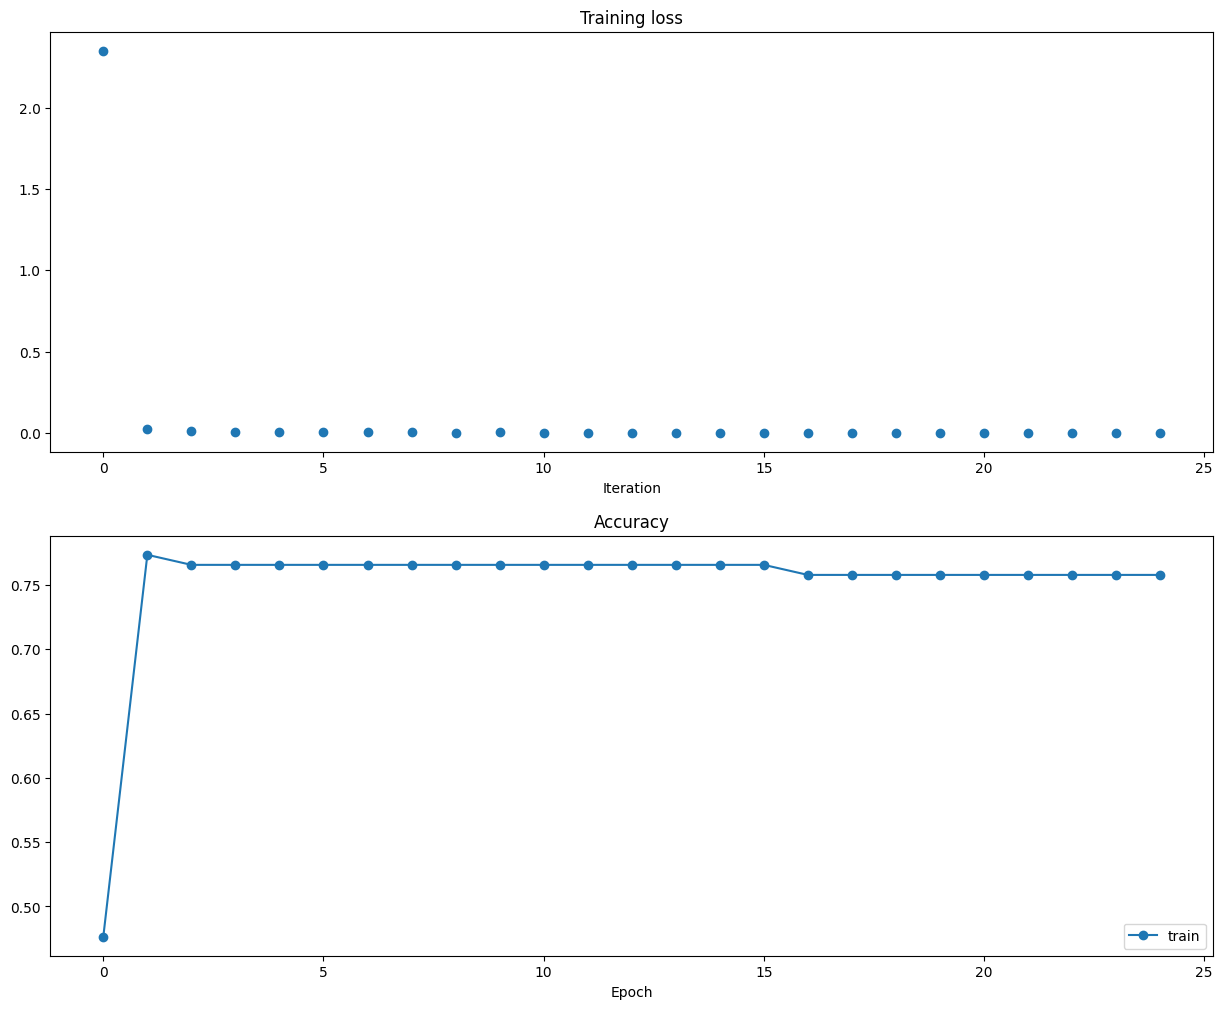

In [36]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(losses, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot( accur,'-o', label='train')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

#Построение сети с помощью Keras

13 (Опционально) Постройте и обучите произвольную нейронную сеть с использованием Keras для решения той же задачи.

In [49]:
import tensorflow.keras as K
import tensorflow.keras.layers as L

In [50]:
def reshape(x, y):
    x = tf.reshape(x, shape=[-1, 28*28])
    return x, y

def normalize(x, y):
    x = tf.cast(x, dtype='float32')
    x = x / 255.
    return x, y

In [51]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))

In [52]:
# Получим итератор
data_iter = iter(train_dataset)

# Получим одну пару (картинка, метка)
x, y = next(data_iter)

In [53]:
# Вызов методов создаёт новый объект датасета, а не модифицирует исходный!
train_dataset = train_dataset.shuffle(buffer_size=len(training_images), reshuffle_each_iteration=True)

# drop_remainder=True говорит датасету не возвращать оставшийся кусок данных, если в нем содержится меньше 128 элементов
train_dataset = train_dataset.batch(128, drop_remainder=True)

next(iter(train_dataset))[0].shape

TensorShape([128, 28, 28])

In [54]:
# Трансформации могут применяться параллельно на нескольких элементах!
train_dataset = train_dataset.map(normalize, num_parallel_calls=-1)
train_dataset = train_dataset.map(reshape, num_parallel_calls=-1)
# Говорит датасету всегда иметь на готове 8 батчей
train_dataset = train_dataset.prefetch(8)

next(iter(train_dataset))[0].shape

TensorShape([128, 784])

In [55]:
# Создадим также датасет для тестирования модели
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# drop_remainder в данном случае не установлен, поскольку мы хотим протестировать модель на всех экземплярах данных.
# Почему drop_remainder использовался выше? Опять-таки, для демонстрации, что это есть
test_dataset = test_dataset.batch(128)
test_dataset = test_dataset.map(normalize, num_parallel_calls=-1)
test_dataset = test_dataset.map(reshape, num_parallel_calls=-1)

next(iter(test_dataset))[0].shape

TensorShape([128, 784])

In [70]:
class NN(K.Model):
    def __init__(self, dim=784, n_classes=10, name='neural_network'):
        super().__init__(name=name)
        self.input_layer = L.Dense(units=dim, activation='relu', name='input')
        self.classification_head = L.Dense(units=n_classes)

    def call(self, x, training=True):
        x = self.input_layer(x, training=training)
        x = self.classification_head(x, training=training)
        return tf.nn.softmax(x)

In [71]:
model = NN()

In [72]:
x,y = next(iter(train_dataset))

In [73]:
tf.shape(x), tf.shape(y)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([128, 784], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([128], dtype=int32)>)

In [74]:
model(x)

<tf.Tensor: shape=(128, 10), dtype=float32, numpy=
array([[0.10007482, 0.09921556, 0.10076389, ..., 0.10067862, 0.10048491,
        0.09937727],
       [0.09979147, 0.0992057 , 0.10012488, ..., 0.09946518, 0.10073926,
        0.10038409],
       [0.09974435, 0.09940869, 0.10039321, ..., 0.1005383 , 0.10003265,
        0.09983344],
       ...,
       [0.09970234, 0.09950121, 0.10000478, ..., 0.09978175, 0.10087314,
        0.100293  ],
       [0.09988777, 0.09966234, 0.10021572, ..., 0.10032082, 0.10014528,
        0.09976101],
       [0.09996422, 0.09959091, 0.10026379, ..., 0.10007457, 0.10041814,
        0.09982166]], dtype=float32)>

In [75]:
loss = K.losses.SparseCategoricalCrossentropy()
accuracy = K.metrics.SparseCategoricalAccuracy()
optim = tf.optimizers.Adam()

EPOCHS = 5

In [76]:
model.compile(optimizer=optim, loss=loss, metrics=[accuracy])

In [77]:
model.evaluate(test_dataset)

79/79 [==============================] - 1s 7ms/step - loss: 2.3034 - sparse_categorical_accuracy: 0.0787


[2.3033530712127686, 0.0786999985575676]

In [78]:
info = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

Epoch 1/5
468/468 [==============================] - 11s 22ms/step - loss: 0.8810 - sparse_categorical_accuracy: 0.7272 - val_loss: 0.5926 - val_sparse_categorical_accuracy: 0.7845
Epoch 2/5
468/468 [==============================] - 10s 21ms/step - loss: 0.5160 - sparse_categorical_accuracy: 0.8175 - val_loss: 0.5009 - val_sparse_categorical_accuracy: 0.8188
Epoch 3/5
468/468 [==============================] - 10s 21ms/step - loss: 0.4587 - sparse_categorical_accuracy: 0.8376 - val_loss: 0.4677 - val_sparse_categorical_accuracy: 0.8312
Epoch 4/5
468/468 [==============================] - 10s 20ms/step - loss: 0.4299 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.4522 - val_sparse_categorical_accuracy: 0.8388
Epoch 5/5
468/468 [==============================] - 8s 18ms/step - loss: 0.4095 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.4323 - val_sparse_categorical_accuracy: 0.8459


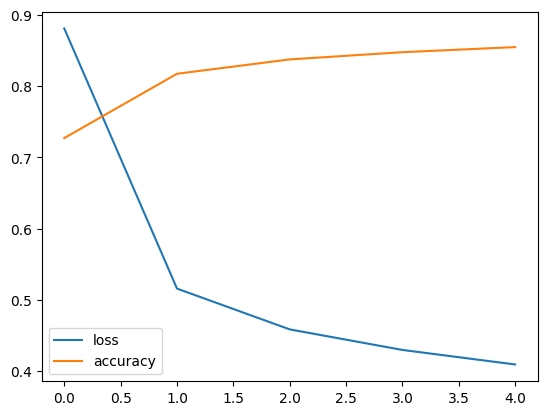

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(info.history['loss'], label='loss')
plt.plot(info.history['sparse_categorical_accuracy'], label='accuracy')
plt.legend()